**VGG-16 Architecture**

VGG-16 is a deep convolution neural network architecture that was developed by the Visual Geometry Group. It is used for image classification, featur extraction and transfer learning in various computer vision task. It was trained on the imageNet dataset.




In [24]:
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import h5py
import matplotlib.pyplot as plt
from scipy import spatial
import matplotlib.image as mpimg
from skimage import io, img_as_ubyte

In [65]:
input_shape=(128, 128, 3)

model = VGG16(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling = 'max', include_top=False)

In [66]:
model.predict(np.zeros((1, 128, 128, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[5.91955930e-02, 0.00000000e+00, 1.72890425e-01, 2.60709107e-01,
        3.65853429e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.00308764e-01, 0.00000000e+00, 0.00000000e+00, 4.82055545e-01,
        0.00000000e+00, 6.70520425e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.49176687e-02,
        0.00000000e+00, 0.00000000e+00, 2.90793300e-01, 1.66184723e-01,
        0.00000000e+00, 0.00000000e+00, 2.43058950e-01, 1.62663832e-01,
        2.59253770e-01, 2.65995860e-01, 2.79749453e-01, 0.00000000e+00,
        5.26819706e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.74729031e-01, 0.00000000e+00,
        2.03375727e-01, 5.19769073e-01, 2.51575768e-01, 9.71066803e-02,
        0.00000000e+00, 4.11775142e-01, 3.92875075e-02, 0.00000000e+00,
        3.41951549e-02, 0.00000000e+00, 0.00000000e+00, 9.955586

In [67]:
def cnn_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [68]:
image_path = "/Users/sudipkhadka/Desktop/mlop/semantic_search/images/"
image_list = [os.path.join(image_path,f) for f in os.listdir(image_path)]

features = []
names = []
for img in os.listdir(image_path):
    X = cnn_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

In [69]:
#store features
output = "VGG16Features.h5"
h5f = h5py.File(output, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [70]:
#Perform query 
h5f = h5py.File("VGG16Features.h5", "r")
features = h5f['dataset_1'][:]
image_name = h5f['dataset_2'][:]
h5f.close()

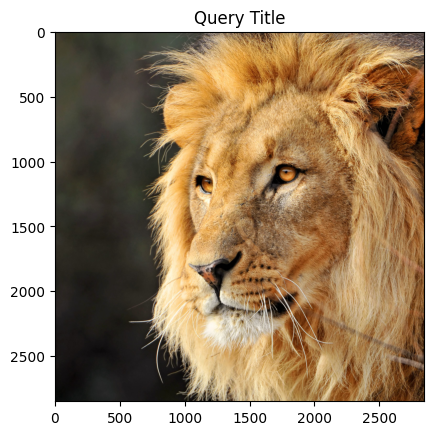

In [106]:
query_image = "/Users/sudipkhadka/Desktop/mlop/semantic_search/images/92c30c59f8.jpg"
plt.imshow(io.imread(query_image))
plt.title("Query Title")
plt.show()

In [107]:
X = cnn_extract_feature(query_image)

scores = []
for i in range(features.shape[0]):
    score  = 1 - spatial.distance.cosine(X, features[i])
    scores.append(score)
scores = np.array(scores)
rank_id = np.argsort(scores)[::-1]
rank_score = scores[rank_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [108]:
n = 7
lists = [image_name[index] for i, index in enumerate(rank_id[0:n])]
print("top %d images in order are: " %n, lists)

top 7 images in order are:  [b'92c30c59f8.jpg', b'2d670c088a.jpg', b'7b87166691.jpg', b'0a928b34b5.jpg', b'2a6c3fd292.jpg', b'24df3def2d.jpg', b'1ebb88dff2.jpg']


In [109]:
image_directory = '/Users/sudipkhadka/Desktop/mlop/semantic_search/images'

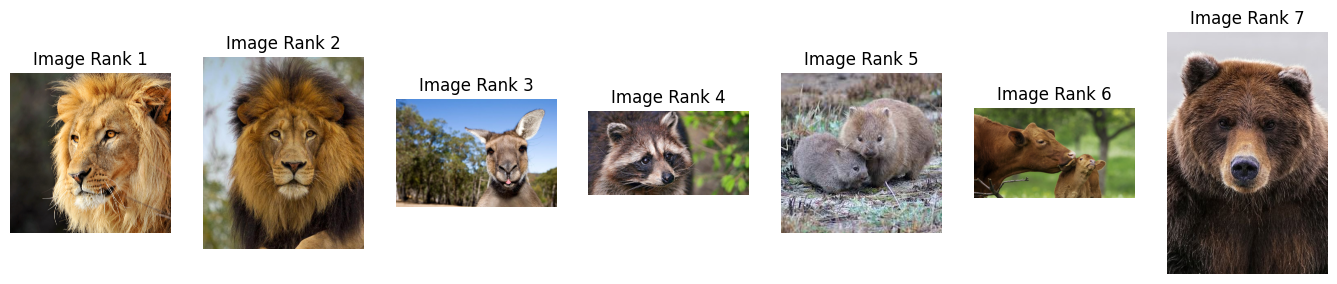

In [110]:
lists = [os.path.join(image_directory, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(image_directory, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

num_images = len(lists)
fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
for i, image_path in enumerate(lists):
    if os.path.exists(image_path):
        img = mpimg.imread(image_path)  
        axes[i].imshow(img)  
        axes[i].axis('off')  
        axes[i].set_title(f"Image Rank {i+1}")
    else:
        print(f"File not found: {image_path}") 
plt.show()